In [149]:
import os
inner_path = r"C:\Users\HP\Downloads\api_data_aadhar_enrolment"

os.listdir(inner_path)

['api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [150]:
import pandas as pd

files = [
r"C:\Users\HP\Downloads\api_data_aadhar_enrolment\api_data_aadhar_enrolment_0_500000.csv",
r"C:\Users\HP\Downloads\api_data_aadhar_enrolment\api_data_aadhar_enrolment_500000_1000000.csv",
r"C:\Users\HP\Downloads\api_data_aadhar_enrolment\api_data_aadhar_enrolment_1000000_1006029.csv"
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df.shape

(1006029, 7)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [152]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [154]:
df = df[~df['state'].astype(str).eq('100000')]

In [155]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [156]:
df.tail()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
1006028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


In [157]:
df.describe

<bound method NDFrame.describe of                date          state          district  pincode  age_0_5  \
0        02-03-2025      Meghalaya  East Khasi Hills   793121       11   
1        09-03-2025      Karnataka   Bengaluru Urban   560043       14   
2        09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29   
3        09-03-2025  Uttar Pradesh           Aligarh   202133       62   
4        09-03-2025      Karnataka   Bengaluru Urban   560016       14   
...             ...            ...               ...      ...      ...   
1006024  31-12-2025    West Bengal    West Midnapore   721149        2   
1006025  31-12-2025    West Bengal    West Midnapore   721150        2   
1006026  31-12-2025    West Bengal    West Midnapore   721305        0   
1006027  31-12-2025    West Bengal    West Midnapore   721504        1   
1006028  31-12-2025    West Bengal    West Midnapore   721517        2   

         age_5_17  age_18_greater  
0              61              37  
1    

### Duplicate state names detected

In [191]:
df['state'].value_counts().sort_index()

state
Andaman And Nicobar Islands                    392
Andhra Pradesh                               65663
Arunachal Pradesh                             1601
Assam                                        31827
Bihar                                        60567
Chandigarh                                     859
Chhattisgarh                                 18550
Dadra And Nagar Haveli And Daman And Diu       416
Delhi                                         6804
Goa                                           1527
Gujarat                                      46624
Haryana                                      15997
Himachal Pradesh                             10346
Jammu And Kashmir                            11455
Jharkhand                                    23218
Karnataka                                    70198
Kerala                                       39145
Ladakh                                         304
Lakshadweep                                    159
Madhya Pradesh           

In [192]:
df['state'].nunique()

36

In [193]:
df['state'] = df['state'].str.replace('&', 'and', regex=False)

In [194]:
state_mapping = {
    # Andaman
    'andaman and nicobar islands': 'Andaman & Nicobar Islands',
    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',
    # Dadra & Daman
    'dadra and nagar haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'daman and diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu & Kashmir',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'Orissa': 'Odisha',

    # Puducherry
    'pondicherry': 'Puducherry',
    'Pondicherry': 'Puducherry',
    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'west bengal ': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West Bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    # Case variants
    'west bengal': 'West Bengal'
}


In [195]:
df['state'] = df['state'].map(state_mapping).fillna(df['state'].str.title())

In [196]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')

In [197]:
df['state'].value_counts().sort_index()

state
Andaman And Nicobar Islands                    392
Andhra Pradesh                               65663
Arunachal Pradesh                             1601
Assam                                        31827
Bihar                                        60567
Chandigarh                                     859
Chhattisgarh                                 18550
Dadra And Nagar Haveli And Daman And Diu       416
Delhi                                         6804
Goa                                           1527
Gujarat                                      46624
Haryana                                      15997
Himachal Pradesh                             10346
Jammu And Kashmir                            11455
Jharkhand                                    23218
Karnataka                                    70198
Kerala                                       39145
Ladakh                                         304
Lakshadweep                                    159
Madhya Pradesh           

In [198]:
df['state'].nunique()

36

In [199]:
missing_summary = df.isnull().sum()
missing_summary

date               0
state              0
district           0
pincode            0
age_0_5            0
age_5_17           0
age_18_greater     0
total_enrolment    0
year               0
month              0
dtype: int64

In [200]:
df.dropna

<bound method DataFrame.dropna of               date          state          district  pincode  age_0_5  \
0       2025-03-02      Meghalaya  East Khasi Hills   793121       11   
1       2025-03-09      Karnataka   Bengaluru Urban   560043       14   
2       2025-03-09  Uttar Pradesh      Kanpur Nagar   208001       29   
3       2025-03-09  Uttar Pradesh           Aligarh   202133       62   
4       2025-03-09      Karnataka   Bengaluru Urban   560016       14   
...            ...            ...               ...      ...      ...   
1006024 2025-12-31    West Bengal    West Midnapore   721149        2   
1006025 2025-12-31    West Bengal    West Midnapore   721150        2   
1006026 2025-12-31    West Bengal    West Midnapore   721305        0   
1006027 2025-12-31    West Bengal    West Midnapore   721504        1   
1006028 2025-12-31    West Bengal    West Midnapore   721517        2   

         age_5_17  age_18_greater  total_enrolment  year  month  
0              61      

In [201]:
df['total_enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [202]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [203]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,year,month
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,3
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,2025,3
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,2025,3
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,2025,3
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,2025,3


In [204]:
# State-wise monthly aggregation
state_monthly = df.groupby(['state', 'year', 'month'], as_index=False)[
    ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']
].sum()

In [205]:
state_monthly

,state,year,month,age_0_5,age_5_17,age_18_greater,total_enrolment
0,Andaman And Nicobar Islands,2025,9,172,16,0,188
1,Andaman And Nicobar Islands,2025,10,74,8,0,82
2,Andaman And Nicobar Islands,2025,11,109,3,0,112
3,Andaman And Nicobar Islands,2025,12,124,5,0,129
4,Andhra Pradesh,2025,3,43,44,29,116
...,...,...,...,...,...,...,...
261,West Bengal,2025,7,15274,11657,1613,28544
262,West Bengal,2025,9,91195,27328,1134,119657
263,West Bengal,2025,10,60423,17270,199,77892
264,West Bengal,2025,11,61020,17967,249,79236


# Univariate Analysis

In [206]:
# Age-wise national aggregation
age_totals = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
age_totals

age_0_5           3546965
age_5_17          1720383
age_18_greater     168136
dtype: int64

### 1. National age-wise enrolment distribution

In [207]:
import matplotlib.pyplot as plt

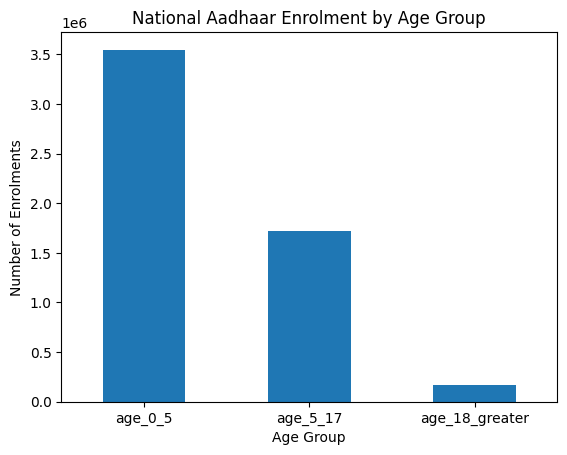

In [209]:
plt.figure()
age_totals.plot(kind='bar')
plt.title("National Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Enrolments")
plt.xticks(rotation=0)
plt.show()

### 2. Top 10 states by total enrolment

In [180]:
state_totals = (df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(10))

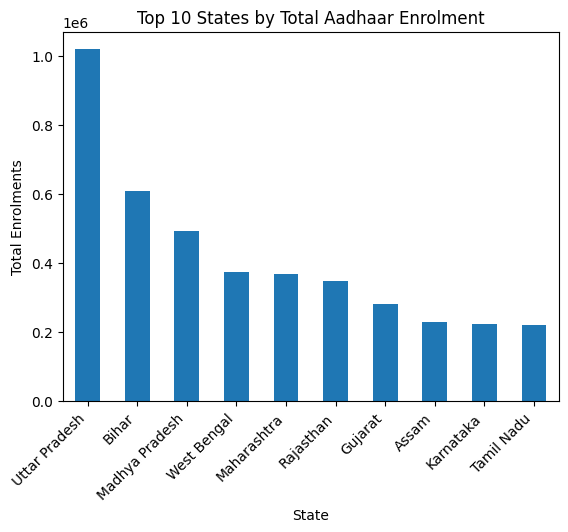

In [210]:
plt.figure()
state_totals.plot(kind='bar')
plt.title("Top 10 States by Total Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Daily enrolment trend

In [211]:
daily_totals = df.groupby('date')['total_enrolment'].sum()

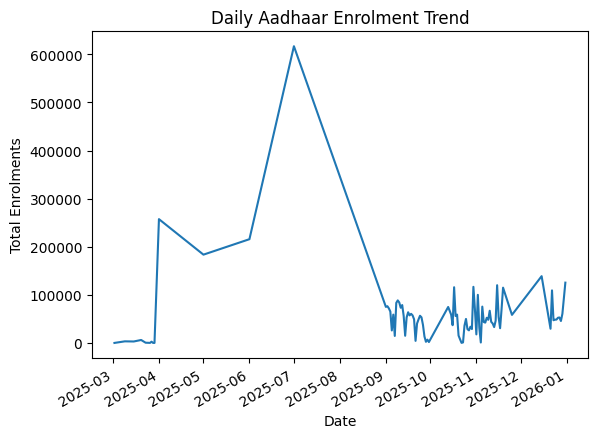

In [212]:
plt.figure()
daily_totals.plot()
plt.title("Daily Aadhaar Enrolment Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.show()

# BIVARIATE ANALYSIS

### 1. Age-wise enrolment across top 5 states

In [213]:
top_states = (df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(5).index)

state_age = (df[df['state'].isin(top_states)].groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum())

In [214]:
state_age

,age_0_5,age_5_17,age_18_greater
state,,,
Bihar,262875,334802,11908
Madhya Pradesh,367990,116381,9599
Maharashtra,278814,82116,8209
Uttar Pradesh,521045,479682,17902
West Bengal,275420,91410,8510


<Figure size 640x480 with 0 Axes>

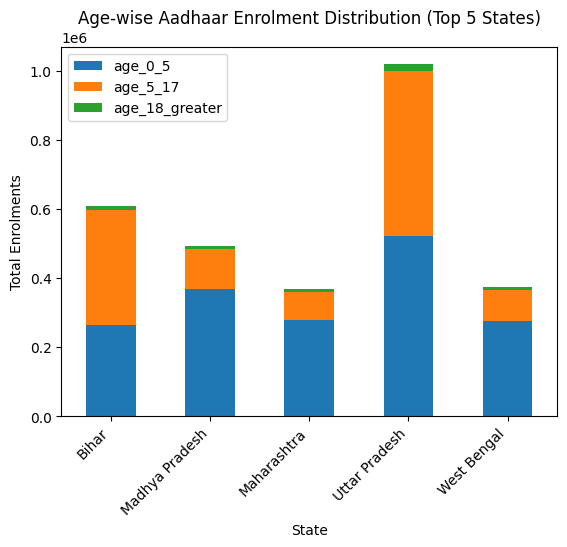

In [186]:
plt.figure()
state_age.plot(kind='bar', stacked=True)
plt.title("Age-wise Aadhaar Enrolment Distribution (Top 5 States)")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45, ha='right')
plt.show()

### 2. Monthly enrolment trend by age group (national)

In [215]:
monthly_age = (df.groupby(['year', 'month'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum())

In [216]:
monthly_age

age_0_5  age_5_17  age_18_greater
year month                                   
2025 3         5367      7407            3808
     4       141154     91371           24913
     5        95342     71690           16584
     6        98943     99911           16880
     7       318352    263333           35183
     9       995612    465401           14854
     10      562856    238957           16106
     11      769156    297658           25182
     12      560183    184655           14626

<Figure size 640x480 with 0 Axes>

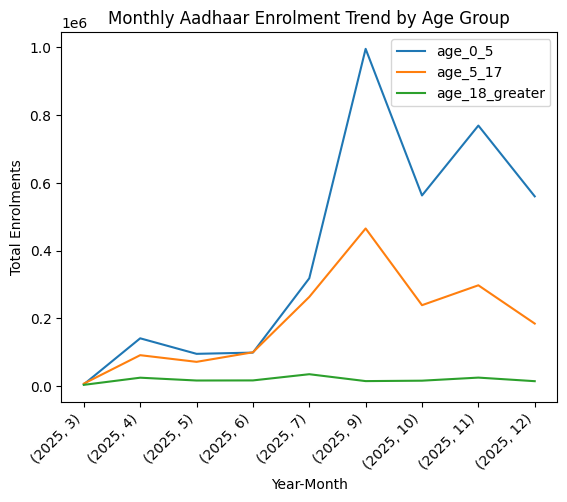

In [115]:
plt.figure()
monthly_age.plot()
plt.title("Monthly Aadhaar Enrolment Trend by Age Group")
plt.xlabel("Year-Month")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Enrolments")
plt.show()

### 3. Adult enrolment share by state

In [217]:
adult_share = (df.groupby('state')[['age_18_greater', 'total_enrolment']].sum())
adult_share

,age_18_greater,total_enrolment
state,,
Andaman And Nicobar Islands,0,511
Andhra Pradesh,1495,127686
Arunachal Pradesh,151,4344
Assam,22877,230197
Bihar,11908,609585
Chandigarh,36,2723
Chhattisgarh,1997,103219
Dadra And Nagar Haveli And Daman And Diu,52,1799
Delhi,3050,94529


In [218]:
adult_share['adult_ratio'] = adult_share['age_18_greater'] / adult_share['total_enrolment']

In [220]:
adult_share_top = adult_share['adult_ratio'].sort_values(ascending=False).head(10)
adult_share_top

state
Meghalaya    0.321460
Assam        0.099380
Mizoram      0.083530
Nagaland     0.071983
Goa          0.069867
Gujarat      0.058229
Sikkim       0.048029
Karnataka    0.045289
Punjab       0.041331
Kerala       0.035666
Name: adult_ratio, dtype: float64

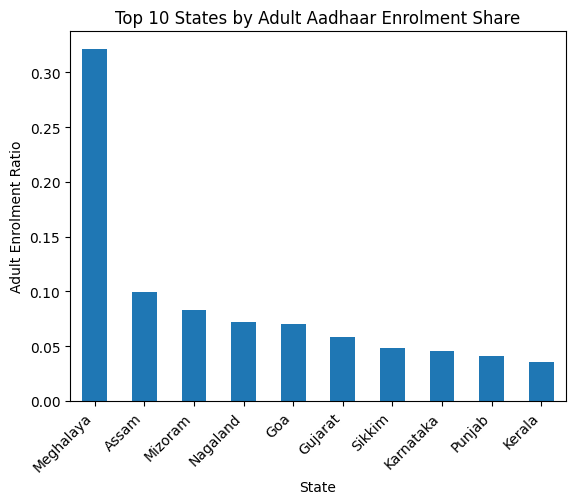

In [221]:
plt.figure()
adult_share_top.plot(kind='bar')
plt.title("Top 10 States by Adult Aadhaar Enrolment Share")
plt.xlabel("State")
plt.ylabel("Adult Enrolment Ratio")
plt.xticks(rotation=45, ha='right')
plt.show()

# TRIVARIATE ANALYSIS

### 1. Monthly Age-wise Trends for Top 3 States

In [224]:
for state in top_states:
    subset = (
        df[df['state'] == state].groupby('month')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index())

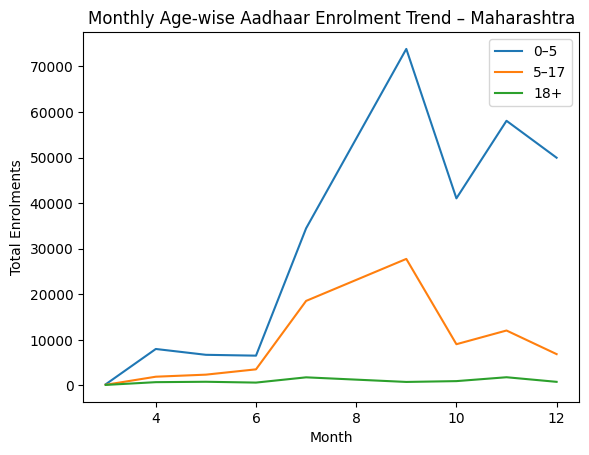

In [225]:
plt.figure()
plt.plot(subset['month'], subset['age_0_5'], label='0–5')
plt.plot(subset['month'], subset['age_5_17'], label='5–17')
plt.plot(subset['month'], subset['age_18_greater'], label='18+')
plt.title(f"Monthly Age-wise Aadhaar Enrolment Trend – {state}")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.legend()
plt.show()

### 2. Enrolment Volatility by State

In [228]:
state_volatility = (df.groupby('state')['total_enrolment'].std().sort_values(ascending=False).head(10))
state_volatility 

state
Meghalaya         133.486145
Delhi              76.685662
Uttar Pradesh      55.453573
Bihar              44.395342
Madhya Pradesh     42.114325
Nagaland           41.489045
Haryana            35.548601
Gujarat            34.269455
Assam              33.056000
Manipur            32.827637
Name: total_enrolment, dtype: float64

### 3. Delayed Adoption Indicator

In [232]:
adult_monthly = (df.groupby(['year', 'month'])[['age_18_greater', 'total_enrolment']].sum().reset_index())
adult_monthly

,year,month,age_18_greater,total_enrolment
0,2025,3,3808,16582
1,2025,4,24913,257438
2,2025,5,16584,183616
3,2025,6,16880,215734
4,2025,7,35183,616868
5,2025,9,14854,1475867
6,2025,10,16106,817919
7,2025,11,25182,1091996
8,2025,12,14626,759464


In [230]:
adult_monthly['adult_share'] = adult_monthly['age_18_greater'] / adult_monthly['total_enrolment']

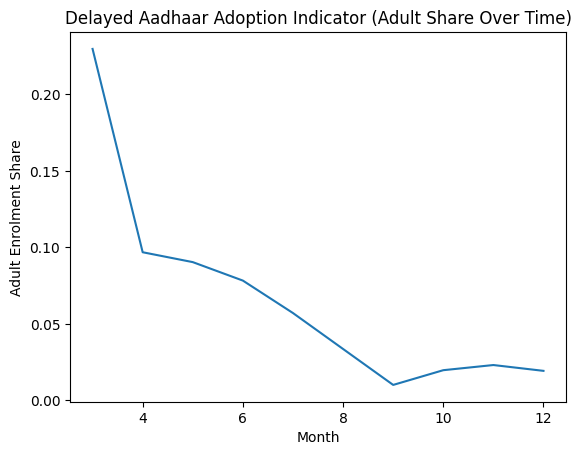

In [231]:
plt.figure()
plt.plot(adult_monthly['month'], adult_monthly['adult_share'])
plt.title("Delayed Aadhaar Adoption Indicator (Adult Share Over Time)")
plt.xlabel("Month")
plt.ylabel("Adult Enrolment Share")
plt.show()